In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.neighbors import kneighbors_graph
import umap
import umap.plot

In [11]:
df = pd.read_excel('C:\\Users\\с\\Downloads\\TCGA.DLBC.sampleMap_HiSeqV2_PANCAN\TCGA_DLBC.xlsx', index_col=0) 


In [35]:
df

,TCGA-FF-8043-01,TCGA-GR-A4D4-01,TCGA-G8-6909-01,TCGA-FF-A7CR-01,TCGA-FF-8062-01,TCGA-GR-7351-01,TCGA-GS-A9TW-01,TCGA-GR-A4D5-01,TCGA-G8-6907-01,TCGA-RQ-AAAT-01,...,TCGA-GS-A9TX-01,TCGA-FF-A7CQ-01,TCGA-FA-A4BB-01,TCGA-G8-6325-01,TCGA-FF-8042-01,TCGA-G8-6324-01,TCGA-GS-A9TU-01,TCGA-GS-A9U4-01,TCGA-GR-7353-01,TCGA-FA-A6HN-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,-1.460892,-0.794092,-0.826092,-0.141792,-0.835492,-0.272692,0.083508,0.147408,-3.815392,-2.534292,...,-2.584492,-1.981392,-0.649392,0.426108,-0.346092,-2.536892,-0.267992,-0.312292,-3.177492,-0.836392
HIF3A,-2.748326,-4.532626,-1.948226,-3.064026,-2.947526,-2.215326,-1.299226,-1.784926,-4.440926,-3.874326,...,-3.426426,-2.732726,-0.784126,-0.971426,-3.419926,-0.133726,-2.024126,-2.928926,-2.292326,0.240874
RNF17,-0.531035,-0.531035,-0.531035,1.354665,0.561065,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,0.592065,-0.531035,-0.531035,-0.531035,0.024965,-0.531035,0.045665
RNF10,-0.106172,-0.339572,-0.607572,0.245328,-0.100372,0.189828,-0.328172,0.274428,-0.324172,-0.352572,...,0.140228,-0.216072,-0.116472,-0.267172,-0.588272,-0.069172,-0.140272,-0.363572,0.085728,-0.090072
RNF11,-2.972378,-2.001178,-3.314078,-1.282978,-2.204678,-2.637378,-1.691578,-1.485378,-2.145478,-2.816378,...,-1.493378,-1.769578,-1.052078,-2.326978,-2.672378,-1.117678,-1.091978,-1.093578,-3.333478,-1.722578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,-0.555686,-0.362586,-1.849286,-1.893786,-0.891686,-0.604486,-0.621686,0.040114,-1.538086,-0.947986,...,-1.906886,0.183714,-1.670586,-0.944486,-1.572486,-0.973186,-1.624486,-0.185886,-0.567986,-1.993086
BCL6B,-0.911227,0.648873,-1.140527,-0.521327,-0.281627,-0.494427,0.429873,0.766073,-1.271327,-0.950427,...,-1.840127,-1.026427,-0.970927,0.385373,-1.432327,0.107973,-0.288127,0.195373,-0.292127,-0.042427
GSTK1,0.458405,0.560605,1.190305,0.241305,1.683805,0.947405,-0.043395,0.616205,0.200505,-0.523495,...,0.424305,0.545105,0.541605,0.565005,0.344805,0.749605,0.139205,-0.209895,0.089605,0.800105


In [22]:
df.loc[['CTDSPL']].T.mean()

sample
CTDSPL   -2.978866
dtype: float64

In [3]:
d_transposed = df.T
new_data = d_transposed.sort_values(by=['CTDSPL'])

In [26]:
s = []
for a in col[0]:
    if a[i]['CTDSPL'] > 2:
        s.append[loc[a[i]]]

NameError: name 'col' is not defined

In [55]:
d_transposed['CTDSPL']

TCGA-FF-8043-01   -3.192031
TCGA-GR-A4D4-01   -3.114231
TCGA-G8-6909-01   -4.041231
TCGA-FF-A7CR-01   -3.563931
TCGA-FF-8062-01   -2.683831
TCGA-GR-7351-01   -2.577131
TCGA-GS-A9TW-01   -3.249431
TCGA-GR-A4D5-01   -2.689431
TCGA-G8-6907-01   -3.889631
TCGA-RQ-AAAT-01    1.330269
TCGA-FM-8000-01   -2.942231
TCGA-GS-A9TZ-01   -3.542831
TCGA-FF-8047-01   -4.113331
TCGA-FA-A4XK-01   -2.661031
TCGA-GS-A9TV-01   -2.791031
TCGA-RQ-A6JB-01   -2.983731
TCGA-FF-A7CW-01   -3.483231
TCGA-FA-A6HO-01   -3.295531
TCGA-FA-A82F-01   -3.337831
TCGA-GS-A9TY-01   -3.019731
TCGA-FA-A7Q1-01   -4.554731
TCGA-FF-8046-01   -1.989231
TCGA-GR-A4D9-01   -3.482231
TCGA-G8-6914-01   -2.152931
TCGA-FA-8693-01   -2.326931
TCGA-RQ-A68N-01   -3.771631
TCGA-FA-A86F-01   -3.274131
TCGA-FF-A7CX-01   -3.933931
TCGA-FF-8061-01   -3.172531
TCGA-G8-6906-01   -2.503431
TCGA-VB-A8QN-01   -2.039731
TCGA-GS-A9U3-01   -2.306731
TCGA-GS-A9TQ-01   -3.839331
TCGA-FF-8041-01   -2.690031
TCGA-FA-A7DS-01   -3.704031
TCGA-GS-A9TT-01   -3

In [56]:
d_transposed = df.T
d_transposed.loc[d_transposed['CTDSPL'] < 2]

sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-FF-8043-01,-1.460892,-2.748326,-0.531035,-0.106172,-2.972378,-0.94691,-0.860094,0.848954,-0.423399,-3.308172,...,-0.748878,-1.587117,2.512867,-1.28139,-2.128377,-0.555686,-0.911227,0.458405,0.577667,0.022288
TCGA-GR-A4D4-01,-0.794092,-4.532626,-0.531035,-0.339572,-2.001178,-0.73901,-0.310794,0.838854,-0.423399,-2.152872,...,0.865522,-1.161017,4.175267,-1.28139,-0.934077,-0.362586,0.648873,0.560605,0.660767,-0.705812
TCGA-G8-6909-01,-0.826092,-1.948226,-0.531035,-0.607572,-3.314078,-1.03341,-1.772194,1.252154,-0.423399,-3.467272,...,1.091122,-1.587117,4.398367,-1.28139,-3.084477,-1.849286,-1.140527,1.190305,1.013967,0.594388
TCGA-FF-A7CR-01,-0.141792,-3.064026,1.354665,0.245328,-1.282978,0.15439,-0.842094,1.055354,-0.423399,-3.029072,...,0.596022,-0.242217,3.596867,-1.28139,-1.227877,-1.893786,-0.521327,0.241305,1.615667,0.017288
TCGA-FF-8062-01,-0.835492,-2.947526,0.561065,-0.100372,-2.204678,-1.14071,-1.225794,2.381754,-0.423399,0.787528,...,-0.748878,-0.495017,3.769567,-1.28139,-2.217277,-0.891686,-0.281627,1.683805,1.085867,0.328488
TCGA-GR-7351-01,-0.272692,-2.215326,-0.531035,0.189828,-2.637378,-0.44961,-0.911994,1.173354,-0.423399,-2.374872,...,-0.748878,-1.587117,4.060067,-1.28139,-2.495177,-0.604486,-0.494427,0.947405,1.217867,0.199288
TCGA-GS-A9TW-01,0.083508,-1.299226,-0.531035,-0.328172,-1.691578,-0.65651,-1.573694,1.568854,-0.423399,-1.661372,...,0.410822,-0.721017,1.551567,-0.78429,-2.007377,-0.621686,0.429873,-0.043395,1.028567,-0.322212
TCGA-GR-A4D5-01,0.147408,-1.784926,-0.531035,0.274428,-1.485378,-0.31951,-0.914094,2.080354,0.360901,-1.537472,...,0.035422,1.173883,2.962267,-1.28139,-0.652577,0.040114,0.766073,0.616205,2.729267,0.211888
TCGA-G8-6907-01,-3.815392,-4.440926,-0.531035,-0.324172,-2.145478,-1.84541,-0.068494,2.257854,1.744101,-5.307272,...,-0.748878,0.580383,5.185167,-1.28139,-2.534677,-1.538086,-1.271327,0.200505,0.046367,-0.225412
TCGA-RQ-AAAT-01,-2.534292,-3.874326,-0.531035,-0.352572,-2.816378,-1.60831,-0.868294,-4.262646,1.257001,-3.626872,...,-0.748878,-1.587117,2.676367,-1.28139,-2.010777,-0.947986,-0.950427,-0.523495,-1.143833,-0.016812


In [13]:
#data = df[(df>df.mean()).all(axis=1)]

In [6]:
d_transposed = df.T

In [7]:
t = d_transposed.reindex(d_transposed.mean().sort_values().index, axis=1)

In [8]:
dd = t.transpose()

In [9]:
high = dd.tail(1000)
low = dd.head(1000)
degs = [high, low]

In [13]:
data = pd.concat(degs)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


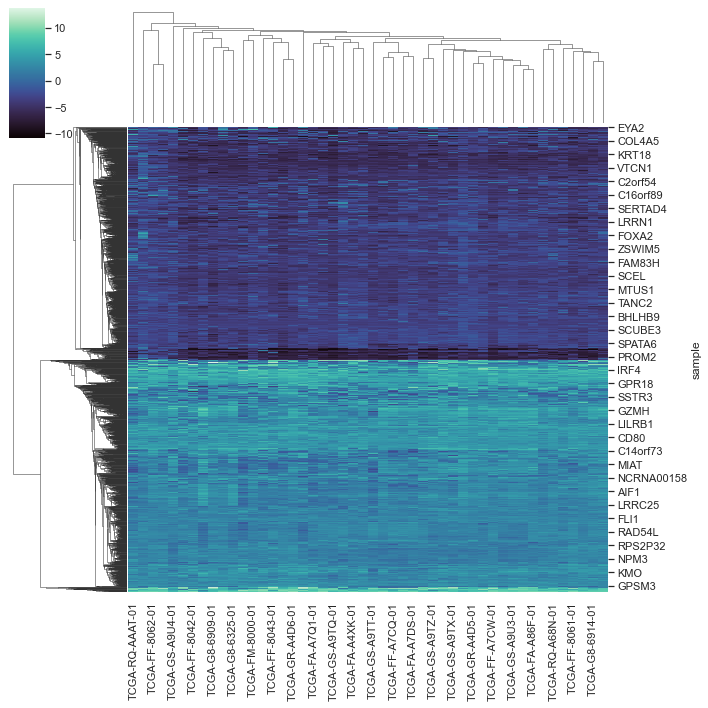

In [10]:
sns.set_theme(color_codes=True)
g = sns.clustermap(pd.concat(degs), cmap="mako")

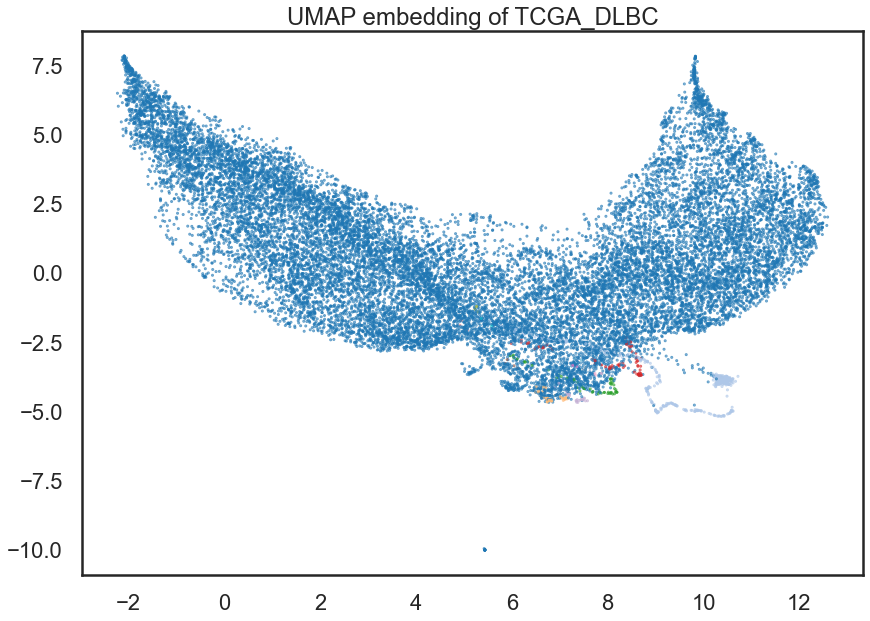

In [47]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
standard_embedding = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.25).fit_transform(df)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c = labelsDBSCAN, cmap='tab20', alpha=0.7, s = 1)
plt.title('UMAP embedding of TCGA_DLBC');

In [14]:
embedding = umap.UMAP(densmap=True).fit_transform(data)

In [46]:
def clustering_agglo(df, n_clusters):
    X = df.to_numpy()
    connectivity = kneighbors_graph(X, int(len(df.index)/10), include_self=False)
    agc = AgglomerativeClustering(linkage='ward',
                                  connectivity=connectivity,
                                  n_clusters=n_clusters)
    agc.fit(X)
    print('Found clusters', len(np.unique(agc.labels_)))
    return agc.labels_
def clustering_dbscan(df, eps, min_samples):
    X = df.to_numpy()
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X)
    print('Found clusters', len(np.unique(dbs.labels_)))
    return dbs.labels_

def clustering_meanshift(df, bandwidth):
    X = df.to_numpy()
    ms = MeanShift(bandwidth=bandwidth, cluster_all=True)
    ms.fit(X)
    print('Found clusters', len(np.unique(ms.labels_)))
    return ms.labels_

labelsDBSCAN = clustering_dbscan(df, eps=0.25, min_samples=3)
#labelsMS = clustering_meanshift(df, bandwidth=0.6)
#labelsAgglo = clustering_agglo(df, n_clusters=45)

Found clusters 14


In [16]:
mapper = umap.UMAP().fit(data)

<AxesSubplot:>

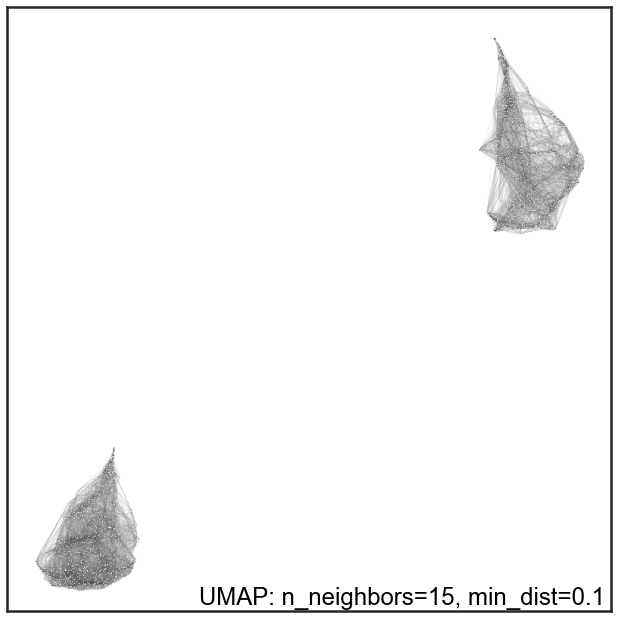

In [19]:
umap.plot.connectivity(mapper, show_points=True)


<AxesSubplot:title={'center':'Colored by RGB coords of PCA embedding'}>

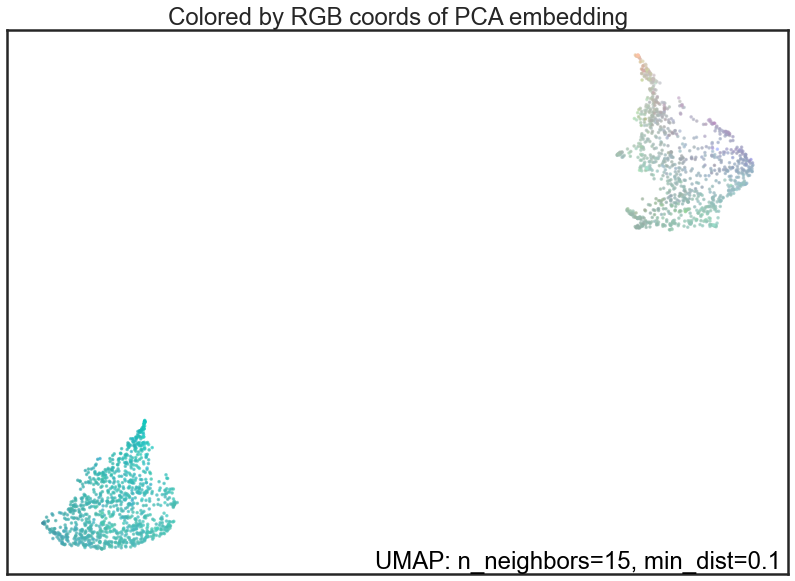

In [20]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

<AxesSubplot:title={'center':'Colored by RGB coords of Vector Quantization'}>

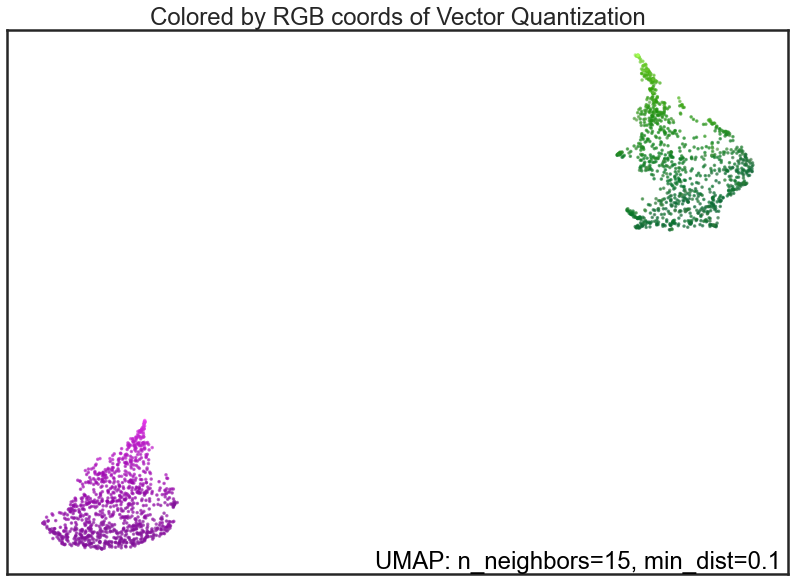

In [21]:
umap.plot.diagnostic(mapper, diagnostic_type='vq')

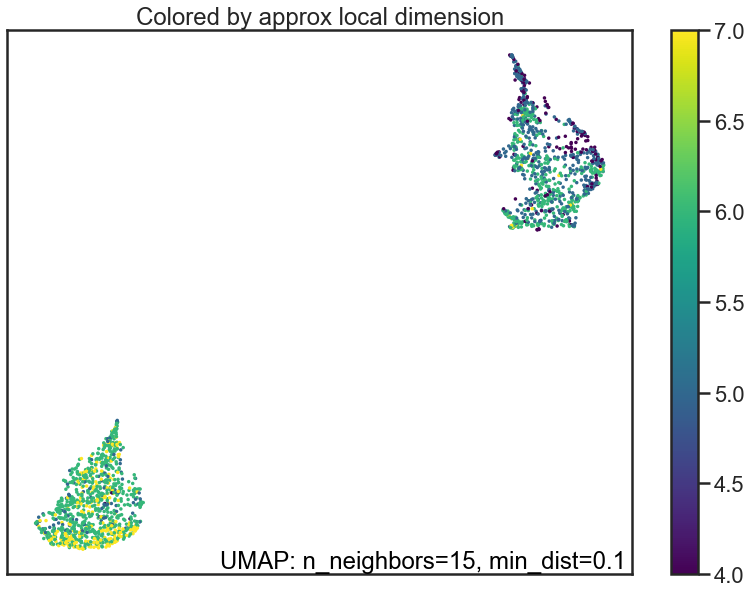

In [23]:
local_dims = umap.plot.diagnostic(mapper, diagnostic_type='local_dim')

C:\ProgramData\Anaconda3\lib\site-packages\umap\plot.py:203: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_nhood_compare" failed type inference due to: No implementation of function Function(<function hstack at 0x00000178D5A2AEE0>) found for signature:
 
 >>> hstack(list(array(int32, 1d, C))<iv=None>)
 
There are 4 candidate implementations:
  - Of which 4 did not match due to:
  Overload in function '_OverloadWrapper._build.<locals>.ol_generated': File: numba\core\overload_glue.py: Line 131.
    With argument(s): '(list(array(int32, 1d, C))<iv=None>)':
   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   No implementation of function Function(<intrinsic stub>) found for signature:
    
    >>> stub(list(array(int32, 1d, C))<iv=None>)
    
   There are 2 candidate implementations:
     - Of which 2 did not match due to:
     Intrinsic in function

<AxesSubplot:title={'center':'Colored by neighborhood Jaccard index'}>

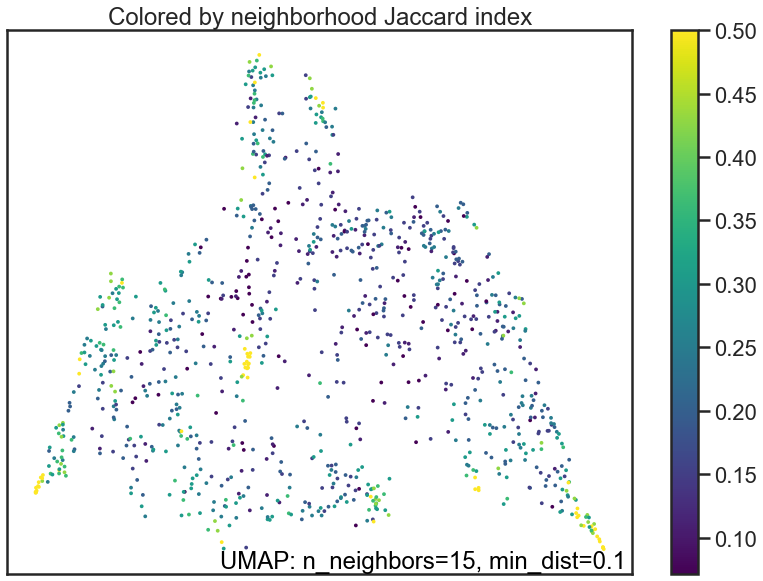

In [252]:
umap.plot.diagnostic(mapper, diagnostic_type='neighborhood')

In [24]:

import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(df)
from sklearn.cluster import DBSCAN

In [25]:
import hdbscan

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [26]:
kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(data)

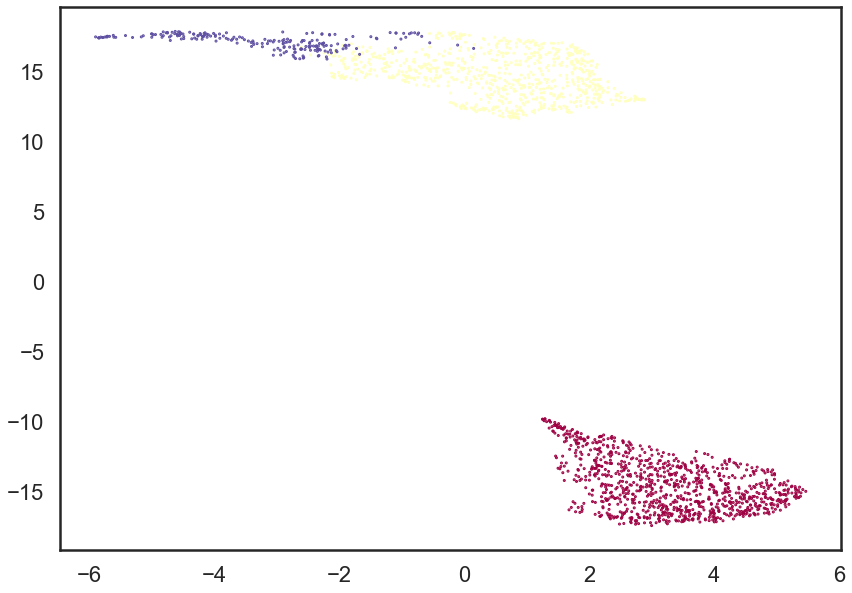

In [27]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=1, cmap='Spectral');

In [28]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(data)

In [29]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=50,
).fit_predict(clusterable_embedding)

NameError: name 'hdbscan' is not defined

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


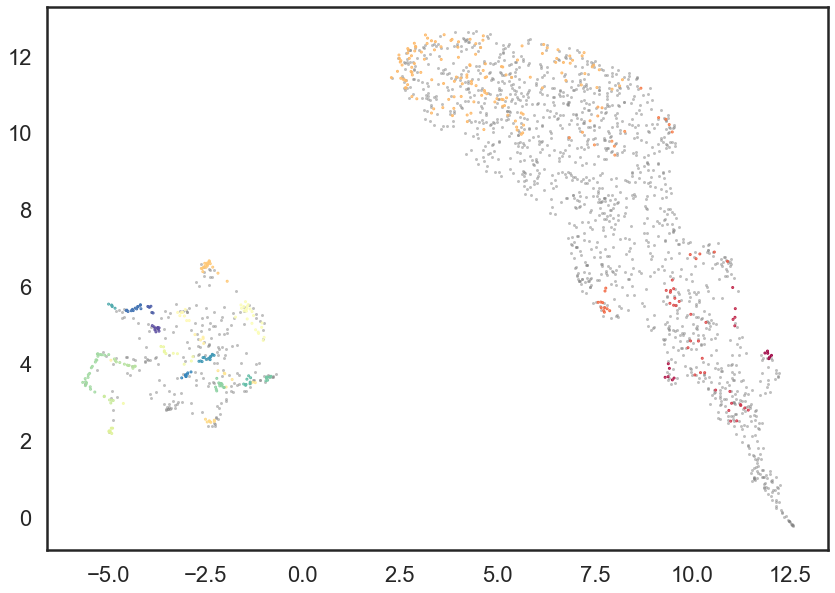

In [44]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=2, min_cluster_size=5).fit_predict(data)
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
              c=(0.5, 0.5, 0.5),
            s=1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=1,
            cmap='Spectral');

In [34]:
labels = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=10,
).fit_predict(clusterable_embedding)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


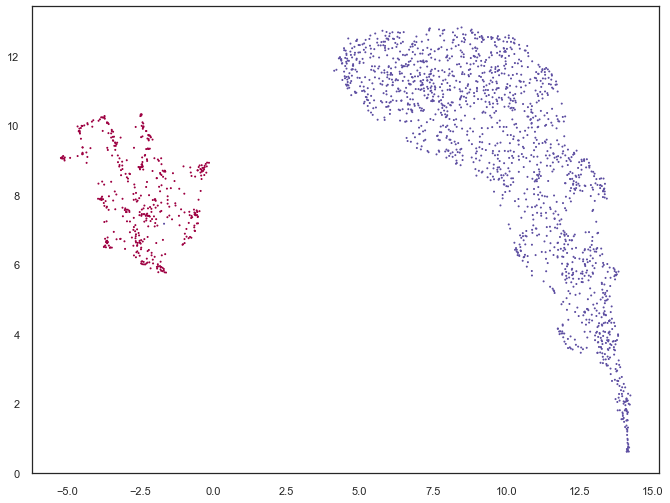

In [479]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=1,
            cmap='Spectral');

In [31]:
from yellowbrick.cluster import KElbowVisualizer

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)

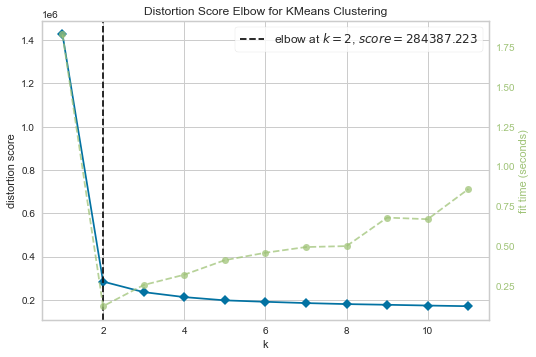

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show()

In [34]:
from yellowbrick.cluster import KElbowVisualizer
model = DBSCAN()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data)
visualizer.show()

ValueError: Invalid parameter n_clusters for estimator DBSCAN(). Check the list of available parameters with `estimator.get_params().keys()`.

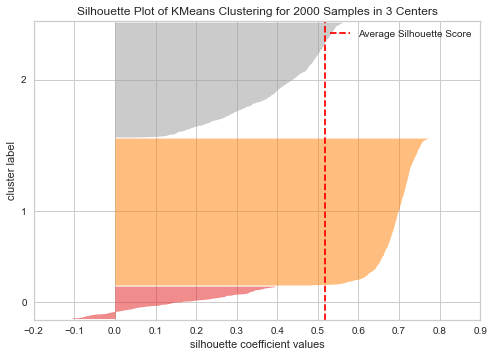

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(data)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the visualizer

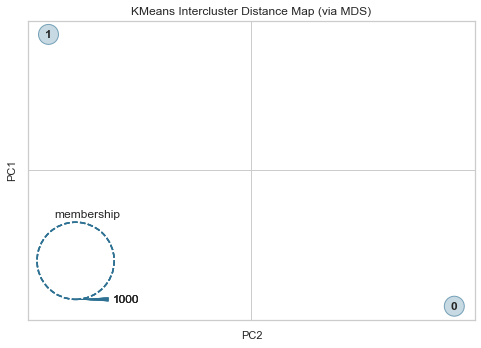

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [39]:
from yellowbrick.cluster import InterclusterDistance
from sklearn.cluster import MiniBatchKMeans

model = KMeans(2)
visualizer = InterclusterDistance(model)

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

In [40]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 781, 0: 219, 1: 1000})

In [41]:
kmeans.cluster_centers_

array([[ 5.26294032,  4.63193165,  5.31869009,  4.73428279,  5.38887   ,
         5.09253621,  4.85415996,  5.05198188,  4.83149923,  4.55646955,
         5.19174626,  5.01535904,  5.46450927,  4.5787837 ,  5.23031886,
         4.7655216 ,  5.15663713,  5.31194535,  4.67728553,  4.89366178,
         4.99423621,  4.78849283,  4.57508918,  4.94859055,  5.17262206,
         5.03349101,  5.28845585,  5.14655676,  5.116849  ,  5.32643758,
         4.9499143 ,  5.3756595 ,  4.54868096,  5.03247366,  4.28649238,
         4.1923079 ,  5.67952251,  4.42281201,  5.19109329,  4.1663143 ,
         5.0768764 ,  4.83281612,  4.73654078,  4.95780242,  4.95733987,
         4.07921475,  5.02175402,  5.29125083],
       [-4.21146921, -3.50610691, -4.63671291, -4.22923841, -2.94149761,
        -3.16508641, -3.93359811, -3.23089391, -4.44611221, -2.87992821,
        -3.63534201, -3.99949771, -4.81313411, -3.67704691, -2.83246481,
        -3.66418641, -4.25137891, -3.98183421, -3.50846961, -4.17869091,
   

In [75]:
data

,TCGA-FF-8043-01,TCGA-GR-A4D4-01,TCGA-G8-6909-01,TCGA-FF-A7CR-01,TCGA-FF-8062-01,TCGA-GR-7351-01,TCGA-GS-A9TW-01,TCGA-GR-A4D5-01,TCGA-G8-6907-01,TCGA-RQ-AAAT-01,...,TCGA-GS-A9TX-01,TCGA-FF-A7CQ-01,TCGA-FA-A4BB-01,TCGA-G8-6325-01,TCGA-FF-8042-01,TCGA-G8-6324-01,TCGA-GS-A9TU-01,TCGA-GS-A9U4-01,TCGA-GR-7353-01,TCGA-FA-A6HN-01
sample,,,,,,,,,,,,,,,,,,,,,
RBM14,-0.684799,0.070439,-1.242693,-0.094144,-0.654578,-1.025798,-0.068860,-0.047199,-0.644776,-0.603701,...,-0.184147,0.171120,-0.480613,-0.903070,-0.905084,-0.985807,-0.152873,0.031645,-0.940786,-0.338537
ZNF700,-0.573602,0.512736,-1.774996,0.324953,-0.337981,-1.485301,-0.808663,-0.057402,-1.554879,-1.506504,...,0.176950,-0.469683,0.055584,-1.270373,-1.062387,-0.729210,0.494324,-0.325958,-1.104189,0.549261
TCOF1,-0.149243,0.107895,-0.243537,0.217412,-0.196322,0.362658,0.549496,0.272557,-0.246920,-0.464145,...,0.323709,0.658776,-0.662657,-0.235214,0.246472,-0.120651,-0.126817,-0.451099,-0.159930,-0.240581
NUP93,-0.748193,-0.613654,0.242914,0.117463,-0.037471,0.553808,0.828647,-0.106793,-0.122270,0.363205,...,-0.215940,0.787326,-0.136106,0.254537,0.972323,-0.467601,0.105133,0.127451,0.308421,0.300270
OPA3,-0.334804,-0.585765,-1.455597,-0.160448,-0.847082,-0.871503,-0.279464,-0.388504,-0.326581,-0.466806,...,-0.480851,-0.301985,-1.171417,-0.189274,-0.270688,-0.249512,0.506322,-0.180160,-0.232690,-0.677541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACAP1,2.715006,3.119944,4.638012,4.059261,4.916427,4.344806,4.044345,4.006005,4.290528,3.244103,...,4.193658,4.075125,3.275692,3.908035,4.135721,4.748398,3.411432,4.582850,4.118919,5.589868
OR10J5,-1.322346,-0.719608,-1.424640,-0.775291,-1.360825,-1.444246,-0.970907,-0.973047,-1.146324,-1.343649,...,-0.786194,-0.962327,-1.105460,-1.236917,-1.286531,-1.110154,-0.575420,-0.815903,-1.229333,-0.936984
CFL1,0.735199,0.207138,0.016805,-0.398846,-0.023680,-0.053500,-0.302362,0.190199,-0.073378,0.570197,...,-0.222048,-0.034282,-0.409814,0.340028,-0.601986,-0.321309,-0.174475,0.358543,-0.167387,0.557462


In [108]:
import yellowbrick as yb
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.features import PCADecomposition
from yellowbrick.features import Rank1D, Rank2D 
from yellowbrick.features import RadViz

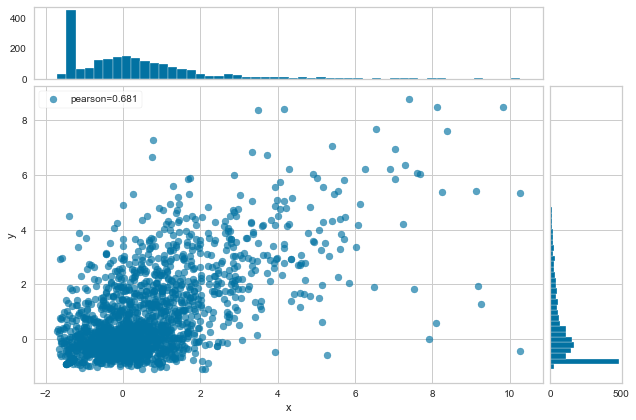

<AxesSubplot:xlabel='x', ylabel='y'>

In [147]:
import yellowbrick as yb
feature = 'TCGA-FF-8043-01'
target = 'TCGA-FF-A7CR-01'

X = data[feature]
y = data[target]

# Instantiate the visualizer
visualizer = JointPlotVisualizer(feature=feature, target=target)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.show()         

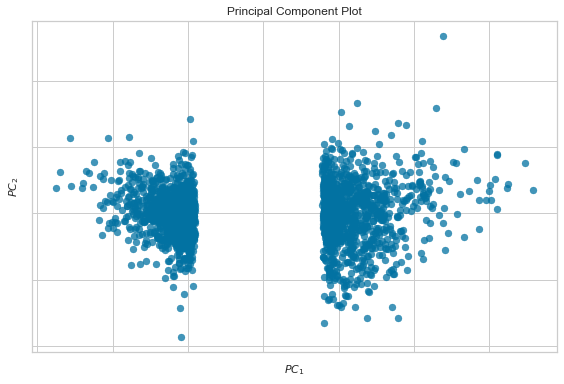

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [42]:
from yellowbrick.features import PCA



visualizer = PCA(scale=True)
visualizer.fit_transform(data)
visualizer.show()

C:\Users\с\AppData\Roaming\Python\Python39\site-packages\yellowbrick\features\pca.py:448: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


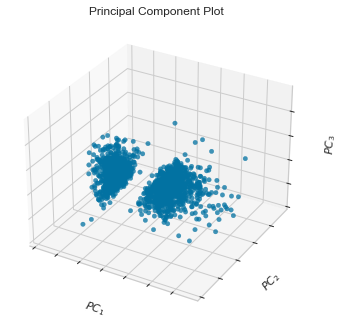

<Axes3DSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [43]:
visualizer = PCA(scale=True, projection=3)
visualizer.fit_transform(data)
visualizer.show()

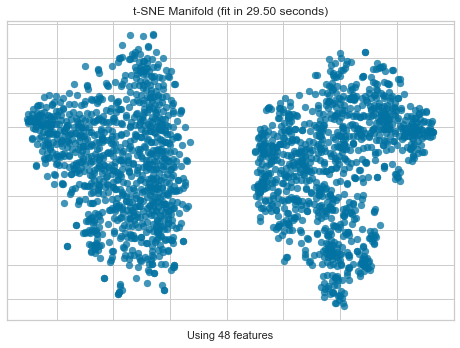

<AxesSubplot:title={'center':'t-SNE Manifold (fit in 29.50 seconds)'}, xlabel='Using 48 features'>

In [44]:
from yellowbrick.features import Manifold
viz = Manifold(manifold="tsne")

viz.fit_transform(data, colormap=True, colors=kmeans_labels, cmap='Spectral')  # Fit the data to the visualizer
viz.show() 

In [248]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [442]:
d = df.to_numpy()

true_label_names = np.genfromtxt(
data,
delimiter=",",
dtype="str"
)


In [443]:
d.shape

(20530, 48)

In [388]:
# d =  d.transpose()

In [391]:
d.shape

(2074, 48)

In [471]:
from umap import UMAP
preprocessor = Pipeline(
 [
("scaler", MinMaxScaler()),
("pca", UMAP(random_state=42, n_neighbors=15, min_dist=0.25)),
     ]
)

In [472]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([11, 30, 26, 17, 15], dtype=int64)

In [473]:
label_encoder.classes_

n_clusters = len(label_encoder.classes_)

In [474]:
clusterer = Pipeline(
 [
 (
 "kmeans",
KMeans(
n_clusters=5,
init="k-means++",
n_init=50,
max_iter=1000,
random_state=42,
  ),
 ),
]
)

In [475]:
pipe = Pipeline(
[
("preprocessor", preprocessor),
("clusterer", clusterer)
  ]
)

In [476]:
pipe.fit(d)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  UMAP(min_dist=0.25, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [477]:
preprocessed_data = pipe["preprocessor"].transform(d)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.38474375

In [398]:
# adjusted_rand_score(true_labels, predicted_labels)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


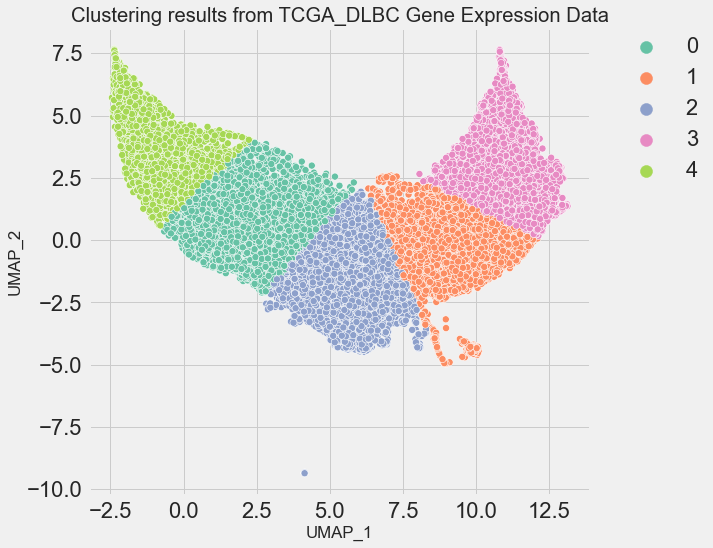

In [478]:
pcadf = pd.DataFrame(
pipe["preprocessor"].transform(d),
columns=["UMAP_1", "UMAP_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
 "UMAP_1",
 "UMAP_2",
s=50,
data=pcadf,
hue="predicted_cluster",
palette="Set2",
)

scat.set_title(
"Clustering results from TCGA_DLBC Gene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [415]:
 silhouette_scores = []
for n in range(2, 11):
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(d)
    silhouette_coef = silhouette_score(
    pipe["preprocessor"].transform(d),
    pipe["clusterer"]["kmeans"].labels_, )

    silhouette_scores.append(silhouette_coef)


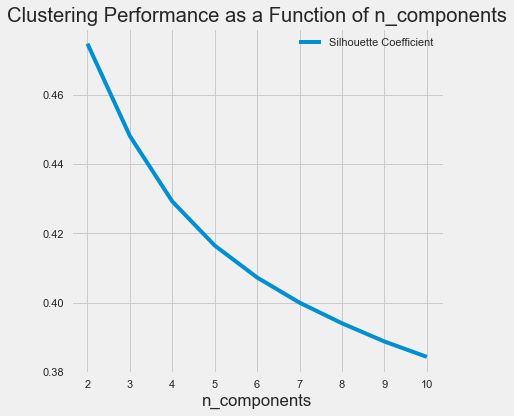

In [416]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
range(2, 11),
silhouette_scores,
c="#008fd5",
label="Silhouette Coefficient",
)

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

In [482]:
clusterList = sorted( dfDBSCAN['cluster'].unique() )

ncols = 4
nrows = int( np.ceil( len(clusterList) / ncols ) )
f = plt.figure( figsize=(20, 1.8*nrows ) )

grid = plt.GridSpec(nrows, ncols, figure=f, wspace=0.3, hspace=0.5)
xcoord = 0
ycoord = 0
for cl in clusterList:
    plt.subplot(grid[xcoord, ycoord])
    toShowCbar = False
    if ycoord == (ncols-1):
        toShowCbar = True
    toShowXLabels = False
    if xcoord == (nrows-1):
        toShowXLabels = True
    ax = sns.heatmap( dfDBSCAN[ dfDBSCAN['cluster'] == cl].iloc[:, :-1],
                     square=False, cmap='coolwarm', vmin=-2, vmax=2,
                     xticklabels= toShowXLabels,
                     annot=False, cbar=toShowCbar, linewidth=0, linecolor='white')
    ax.set_title(f'Cluster {cl}')
    ycoord += 1
    if ycoord == ncols:
        xcoord += 1
        ycoord = 0

KeyError: 'cluster'